## Predicting defaulting on Credit Card applications

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

#defaults
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams.update({'font.size': 10})
plt.rcParams['xtick.major.pad']='5'
plt.rcParams['ytick.major.pad']='5'

plt.style.use('ggplot')

In [2]:
# Setting the seed for reproducibility
np.random.seed(1738)

#### reading data 

In [3]:
df = pd.read_csv('../Data/credit_card_default_TRAIN.csv', header=1)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 25 columns):
ID                            22500 non-null int64
LIMIT_BAL                     22500 non-null int64
SEX                           22500 non-null int64
EDUCATION                     22500 non-null int64
MARRIAGE                      22500 non-null int64
AGE                           22500 non-null int64
PAY_0                         22500 non-null int64
PAY_2                         22500 non-null int64
PAY_3                         22500 non-null int64
PAY_4                         22500 non-null int64
PAY_5                         22500 non-null int64
PAY_6                         22500 non-null int64
BILL_AMT1                     22500 non-null int64
BILL_AMT2                     22500 non-null int64
BILL_AMT3                     22500 non-null int64
BILL_AMT4                     22500 non-null int64
BILL_AMT5                     22500 non-null int64
BILL_AMT6               

In [6]:
print(df.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


### Distribution of Payment

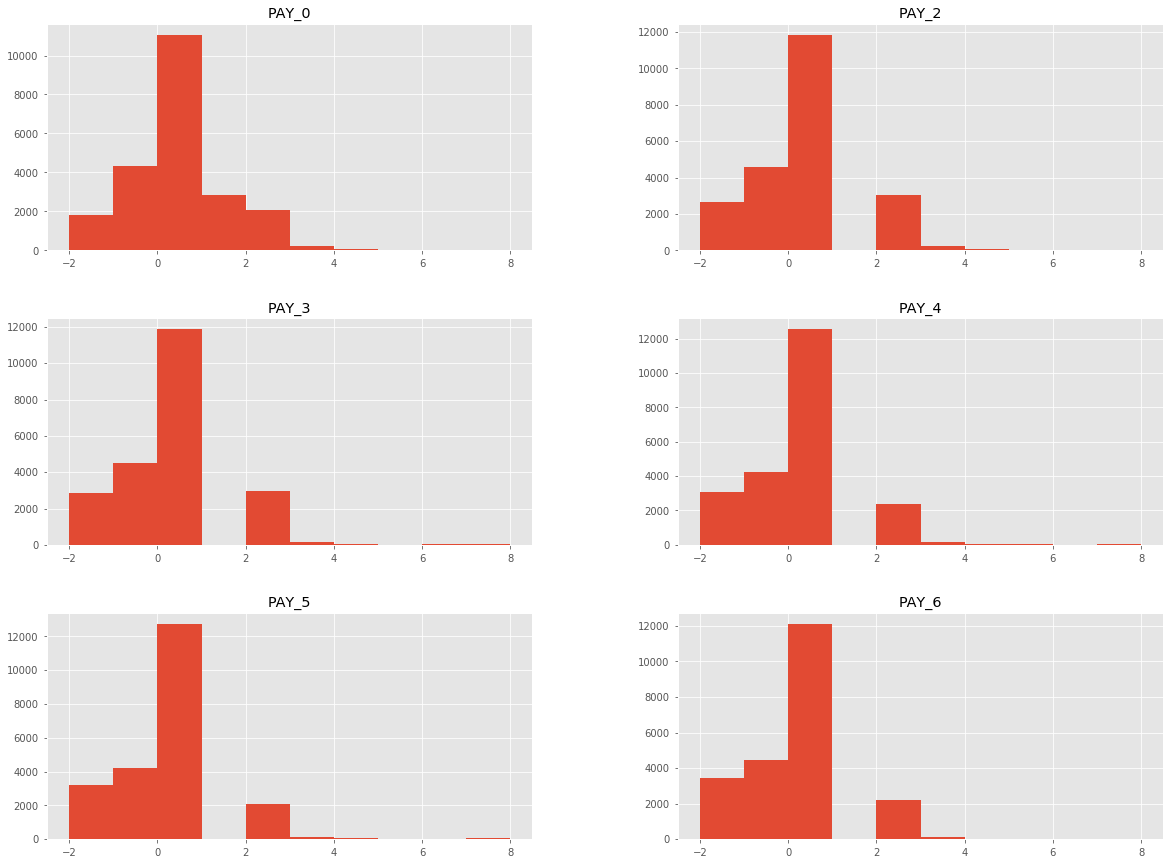

In [7]:
df.loc[:, ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]\
    .hist(bins=10, figsize=(20,15))
plt.show()

#### From the above plot it is visible that some of the people make payment two months early, then more that that pay one month early. Majority of the people make payment on time, while some are running behind in payment.

In [8]:
df.loc[:, ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
           'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


#### Renaming target variable & PAY0

In [9]:
df.columns = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULTING']

In [10]:
d = df.groupby(['DEFAULTING']).size()

defaulting accounts are 22.613333333333333% out of 22500 observations


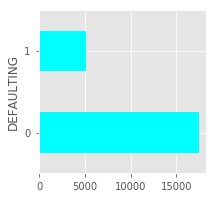

In [11]:
fig = plt.figure()
fig.set_size_inches(3,3)
print("defaulting accounts are {0}% out of {1} observations".format(100* d[1]/(d[1]+d[0]), d[1]+d[0]))
p = d.plot(kind='barh', color='cyan')

### Exploring categorical variables

In [12]:
print(df['SEX'].unique())

[2 1]


female accounts are 61.01777777777778% out of 22500 observations


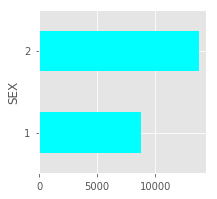

In [13]:
fig = plt.figure()
fig.set_size_inches(3,3)
d = df.groupby(['SEX']).size()
print("female accounts are {0}% out of {1} observations".format(100* d[2]/(d[1]+d[2]), d[1]+d[2]))
d.plot(kind='barh', color='cyan')

female defaulting accounts are 21.334401631582782% out of 13729 observations
male defaulting accounts are 24.61520921217649% out of 8771 observations


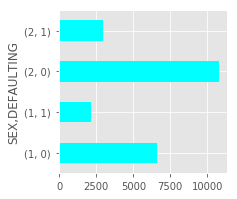

In [14]:
fig = plt.figure()
fig.set_size_inches(3,3)
d = df.groupby(['SEX', 'DEFAULTING']).size().reset_index()
print("female defaulting accounts are {0}% out of {1} observations".format(100* d[0][3]/(d[0][3]+d[0][2]), d[0][3]+d[0][2]))
print("male defaulting accounts are {0}% out of {1} observations".format(100* d[0][1]/(d[0][1]+d[0][0]), d[0][1]+d[0][0]))
df.groupby(['SEX', 'DEFAULTING']).size().plot(kind='barh', color='cyan')

### From the above plot we can infer that Males tend to more defaulting

In [15]:
df['SEX_CAT'] = df['SEX'].astype('category').cat.rename_categories(['M', 'F'])
df['MARRIAGE_CAT'] = df['MARRIAGE'].astype('category').cat.rename_categories(['na', 'married', 'single', 'other'])

In [16]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTING,SEX_CAT,MARRIAGE_CAT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,F,married
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,F,single
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,F,single
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,F,married
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,M,married


In [17]:
for i in range(0, 100, 10):
    print(i)

0
10
20
30
40
50
60
70
80
90


In [18]:
df['AGE_CAT'] = pd.cut(df['AGE'], [0,25,35,45,55,65,75,90], right=False)

In [19]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTING,SEX_CAT,MARRIAGE_CAT,AGE_CAT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,689,0,0,0,0,1,F,married,"[0, 25)"
1,2,120000,2,2,2,26,-1,2,0,0,...,0,1000,1000,1000,0,2000,1,F,single,"[25, 35)"
2,3,90000,2,2,2,34,0,0,0,0,...,1518,1500,1000,1000,1000,5000,0,F,single,"[25, 35)"
3,4,50000,2,2,1,37,0,0,0,0,...,2000,2019,1200,1100,1069,1000,0,F,married,"[35, 45)"
4,5,50000,1,2,1,57,-1,0,-1,0,...,2000,36681,10000,9000,689,679,0,M,married,"[55, 65)"


In [20]:
import re

In [21]:
pattern = re.compile("^PAY_[0-9]+$")
pay_status_columns = [ x for x in df.columns if (pattern.match(x))]
for i in pay_status_columns:
    df[i] = df[i].astype('category')

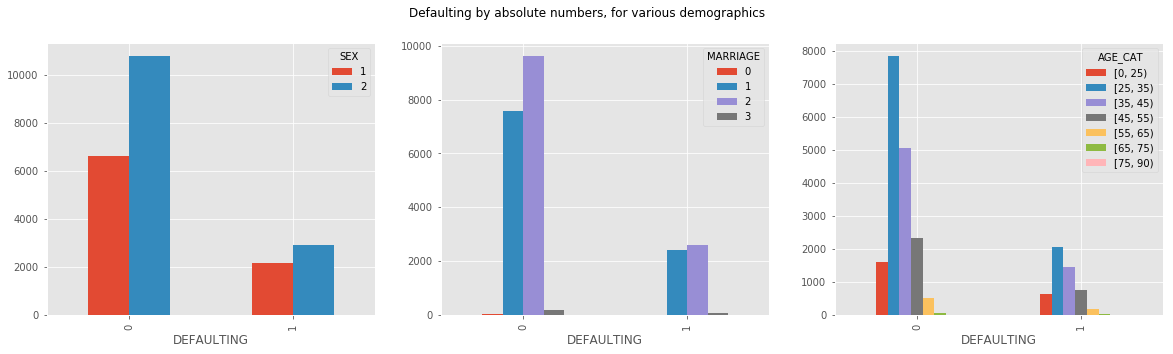

In [22]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(20,5)
fig.suptitle('Defaulting by absolute numbers, for various demographics')

d = df.groupby(['DEFAULTING', 'SEX']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[0])

d = df.groupby(['DEFAULTING', 'MARRIAGE']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[1])

d = df.groupby(['DEFAULTING', 'AGE_CAT']).size()
p = d.unstack(level=1).plot(kind='bar', ax=ax[2])

### Feature engineering

In [23]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULTING', 'SEX_CAT', 'MARRIAGE_CAT', 'AGE_CAT'],
      dtype='object')

In [24]:
def selectColumns(prefix, start=1, end=6):
    return [prefix+str(i) for i in np.arange(start,end+1)]

In [25]:
selectColumns('PAY_')

['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [26]:
from math import log

# average and standard deviation of payments
df['PAY_AVG'] = df[selectColumns('PAY_')].mean(axis=1)
df['PAY_STD'] = df[selectColumns('PAY_')].std(axis=1)

In [27]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULTING,SEX_CAT,MARRIAGE_CAT,AGE_CAT,PAY_AVG,PAY_STD
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,F,married,"[0, 25)",-0.333333,1.861899
1,2,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,F,single,"[25, 35)",0.500000,1.224745
2,3,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,F,single,"[25, 35)",0.000000,0.000000
3,4,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,F,married,"[35, 45)",0.000000,0.000000
4,5,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,M,married,"[55, 65)",-0.333333,0.516398


In [28]:
# average payment
df['PAY_AMT_AVG'] = df[selectColumns('PAY_AMT')].mean(axis=1)

# log of average
df['PAY_AMT_AVG_LOG'] = df['PAY_AMT_AVG'].apply(lambda x: log(x+1))

#ratio of payment amount to payment amount average
for i in np.arange(1,7):
    df['PAY_RATIO'+str(i)] = df['PAY_AMT'+str(i)]/df['PAY_AMT_AVG']

# log of payments
for i in np.arange(1,7):
    df['PAY_AMT_LOG'+str(i)] = df['PAY_AMT'+str(i)].apply(lambda x: log(x+1))

In [29]:
# average bill
df['BILL_AMT_AVG'] = df[selectColumns('BILL_AMT')].mean(axis=1)
df['BILL_AMT_AVG_LOG'] = df['BILL_AMT_AVG'].apply(lambda x: log(x+1) if x>0 else 0)

# creating a separate feature for bill sign
for i in np.arange(1,7):
    df['BILL_AMT_SIGN'+str(i)] = df['BILL_AMT'+str(i)].apply(lambda x: float(x>0))
    
# creating a separate feature for bill log (0 if bill is negative)
for i in np.arange(1,7):
    df['BILL_AMT_LOG'+str(i)] = df['BILL_AMT'+str(i)].apply(lambda x: log(x+1) if x>0 else 0)
    
#ratio of bill amounts to the limit balance
for i in np.arange(1,7):
    df['BILL_RATIO'+str(i)] = df['BILL_AMT'+str(i)]/df['LIMIT_BAL']


In [30]:
df['LIMIT_BAL'].describe()

count      22500.000000
mean      163424.608000
std       128515.245979
min        10000.000000
25%        50000.000000
50%       135000.000000
75%       230000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [31]:
# creating new variable for limit_bal log
df['LIMIT_BAL_LOG'] = df['LIMIT_BAL'].apply(lambda x: log(x+1))
# creating categorical variable for limit_bal
df['LIMIT_BAL_CAT'] = pd.cut(df['LIMIT_BAL'], range(0, int(1e6), 10000), right=False)

In [32]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT_LOG5,BILL_AMT_LOG6,BILL_RATIO1,BILL_RATIO2,BILL_RATIO3,BILL_RATIO4,BILL_RATIO5,BILL_RATIO6,LIMIT_BAL_LOG,LIMIT_BAL_CAT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0.000000,0.000000,0.195650,0.155100,0.034450,0.000000,0.000000,0.000000,9.903538,"[20000, 30000)"
1,2,120000,2,2,2,26,-1,2,0,0,...,8.147867,8.090096,0.022350,0.014375,0.022350,0.027267,0.028792,0.027175,11.695255,"[120000, 130000)"
2,3,90000,2,2,2,34,0,0,0,0,...,9.612400,9.651816,0.324878,0.155856,0.150656,0.159233,0.166089,0.172767,11.407576,"[90000, 100000)"
3,4,50000,2,2,1,37,0,0,0,0,...,10.273671,10.293771,0.939800,0.964660,0.985820,0.566280,0.579180,0.590940,10.819798,"[50000, 60000)"
4,5,50000,1,2,1,57,-1,0,-1,0,...,9.859901,9.859118,0.172340,0.113400,0.716700,0.418800,0.382920,0.382620,10.819798,"[50000, 60000)"


In [33]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEFAULTING', 'SEX_CAT', 'MARRIAGE_CAT', 'AGE_CAT', 'PAY_AVG',
       'PAY_STD', 'PAY_AMT_AVG', 'PAY_AMT_AVG_LOG', 'PAY_RATIO1', 'PAY_RATIO2',
       'PAY_RATIO3', 'PAY_RATIO4', 'PAY_RATIO5', 'PAY_RATIO6', 'PAY_AMT_LOG1',
       'PAY_AMT_LOG2', 'PAY_AMT_LOG3', 'PAY_AMT_LOG4', 'PAY_AMT_LOG5',
       'PAY_AMT_LOG6', 'BILL_AMT_AVG', 'BILL_AMT_AVG_LOG', 'BILL_AMT_SIGN1',
       'BILL_AMT_SIGN2', 'BILL_AMT_SIGN3', 'BILL_AMT_SIGN4', 'BILL_AMT_SIGN5',
       'BILL_AMT_SIGN6', 'BILL_AMT_LOG1', 'BILL_AMT_LOG2', 'BILL_AMT_LOG3',
       'BILL_AMT_LOG4', 'BILL_AMT_LOG5', 'BILL_AMT_LOG6', 'BILL_RATIO1',
       'BILL_RATIO2', 'BILL_RATIO3', 'BILL_RATIO4', 'BILL_RATIO5',
       'BILL_RATIO6', 'LIMIT_BAL_LOG',

In [39]:
from patsy import dmatrices

formula  = 'DEFAULTING ~ '

# original features
formula += 'C(SEX) + C(MARRIAGE) +  C(EDUCATION) + AGE'
formula += '+' + '+'.join(selectColumns('PAY_'))

#### engineered / normalized features

# categorical age and credit limit (binned)
formula += '+' + 'C(AGE_CAT)'
formula += '+' + 'C(LIMIT_BAL_CAT) + LIMIT_BAL_LOG'

#pay delays
formula += '+' + 'PAY_AVG + PAY_STD'
    
#pay_amt
formula += '+' + 'PAY_AMT_AVG_LOG'
formula += '+' + '+'.join(selectColumns('PAY_RATIO'))
formula += '+' + '+'.join(selectColumns('PAY_AMT_LOG'))

# bill amounts
formula += '+' + 'BILL_AMT_AVG_LOG'
formula += '+' + '+'.join(selectColumns('BILL_RATIO'))
formula += '+' + '+'.join(selectColumns('BILL_AMT_SIGN'))
formula += '+' + '+'.join(selectColumns('BILL_AMT_LOG'))

y, X = dmatrices(formula, data=df, return_type='dataframe')
y = y.iloc[:, 0]

In [38]:
y.head()

,DEFAULTING
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0


### Feature selection

In [40]:
import warnings
from sklearn.feature_selection import SelectKBest, f_classif

warnings.simplefilter(action='ignore', category=(UserWarning,RuntimeWarning))

selector = SelectKBest(f_classif, 25)
selector.fit(X, y)

SelectKBest(k=25, score_func=<function f_classif at 0x7f6f8cd2d6a8>)

In [41]:
top_indices = np.nan_to_num(selector.scores_).argsort()[-25:][::-1]
selector.scores_[top_indices]
X.columns[top_indices]

Index(['PAY_1[T.2]', 'PAY_2[T.2]', 'PAY_AVG', 'PAY_3[T.2]', 'PAY_4[T.2]',
       'PAY_5[T.2]', 'PAY_STD', 'PAY_6[T.2]', 'PAY_1[T.0]', 'LIMIT_BAL_LOG',
       'PAY_AMT_LOG1', 'PAY_2[T.0]', 'PAY_AMT_AVG_LOG', 'BILL_RATIO6',
       'BILL_RATIO5', 'BILL_RATIO4', 'PAY_AMT_LOG2', 'BILL_RATIO3',
       'PAY_1[T.3]', 'BILL_RATIO2', 'PAY_AMT_LOG3', 'PAY_3[T.0]',
       'PAY_AMT_LOG4', 'BILL_RATIO1', 'PAY_2[T.3]'],
      dtype='object')

### demographics are not heavily affecting the prediction .
### paid amount, delay and bill ratio are top indicators

#### viz - confusion matrix and auc curves

In [46]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix

def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

    fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])


#### feature scaling

In [42]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [43]:
from sklearn.pipeline import Pipeline

preprocess = Pipeline([('anova', selector), ('scale', scaler)])
preprocess.fit(X,y)

X_prep = preprocess.transform(X)

## Model selection and Validation 

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_prep, y, test_size=0.2, random_state=42)

### Models 

#### Logistic regression

In [47]:
from sklearn import linear_model

# Create logistic regression object
regr = linear_model.LogisticRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

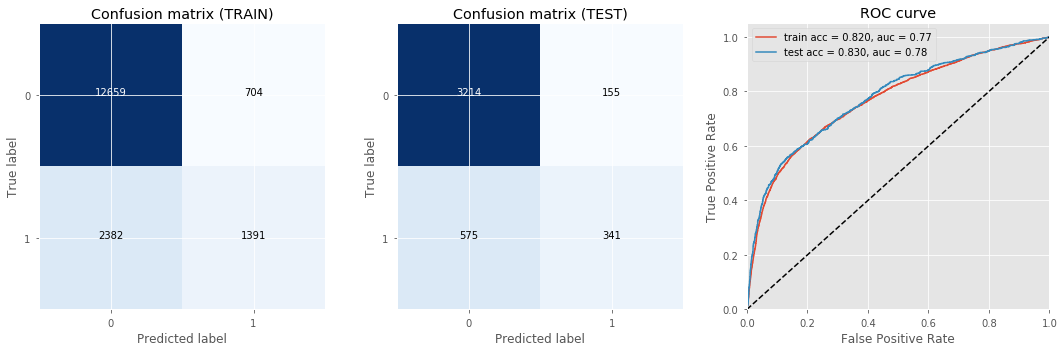

In [48]:
y_train_pred = regr.predict_proba(X_train)[:,1]
y_test_pred = regr.predict_proba(X_test)[:,1]

threshold = 0.5

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()

#### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500, min_samples_leaf=5)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

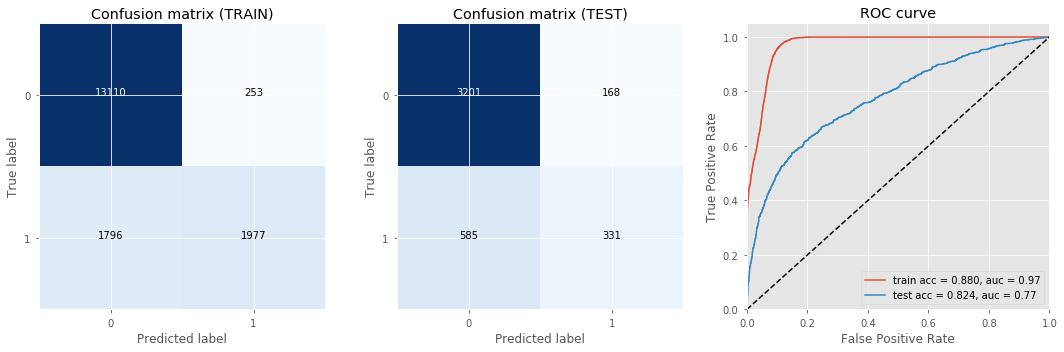

In [50]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score

threshold = 0.5
y_train_pred = rf.predict_proba(X_train)[:,1]
y_test_pred = rf.predict_proba(X_test)[:,1]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()

#### Decision Trees boosting

In [52]:
import xgboost as xgb

In [53]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [54]:
num_round = 5
evallist  = [(dtest,'eval'), (dtrain,'train')]
param = {'objective':'binary:logistic', 'silent':1, 'eval_metric': ['error', 'logloss']}

bst = xgb.train( param, dtrain, num_round, evallist )

[0]	eval-error:0.181797	eval-logloss:0.57464	train-error:0.171802	train-logloss:0.572033
[1]	eval-error:0.176663	eval-logloss:0.510574	train-error:0.169993	train-logloss:0.506503
[2]	eval-error:0.17713	eval-logloss:0.474998	train-error:0.170577	train-logloss:0.467792
[3]	eval-error:0.175963	eval-logloss:0.454185	train-error:0.169001	train-logloss:0.443751
[4]	eval-error:0.176196	eval-logloss:0.441138	train-error:0.167951	train-logloss:0.428562


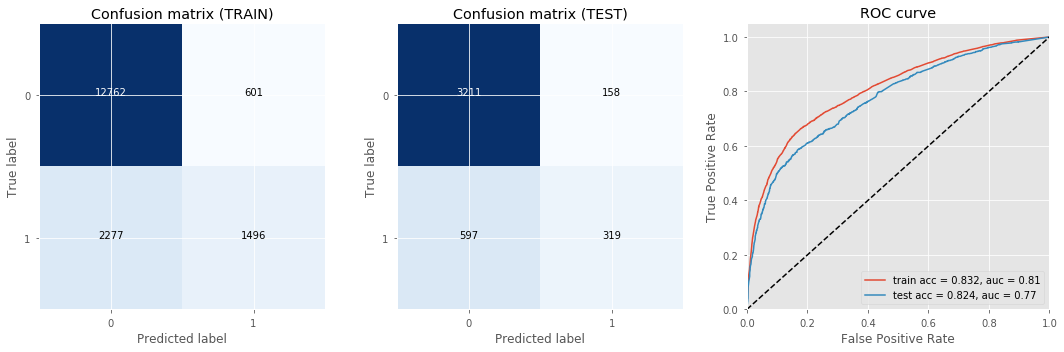

In [55]:
threshold = 0.5
y_train_pred = bst.predict(dtrain)
y_test_pred = bst.predict(dtest)

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()

### 